In [15]:
import numpy as np

In [16]:
import pandas as pd

In [17]:
import matplotlib.pyplot as plt

In [18]:
import tensorflow as tf

In [19]:
from tensorflow.keras.datasets import cifar10

In [20]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [21]:
X_train.shape

(50000, 32, 32, 3)

In [22]:
X_test.shape

(10000, 32, 32, 3)

In [23]:
y_train.shape

(50000, 1)

In [24]:
y_test.shape

(10000, 1)

In [25]:
image = ["Airplane","Automobile", "Bird","Car","Deer","Dog","Frog","Horse","Ship","Truck"]

In [15]:
image

['Airplane',
 'Automobile',
 'Bird',
 'Car',
 'Deer',
 'Dog',
 'Frog',
 'Horse',
 'Ship',
 'Truck']

In [26]:
X_train[4000]

array([[[ 86, 138, 179],
        [ 78, 116, 147],
        [ 56,  76,  95],
        ...,
        [ 66, 115, 155],
        [ 63, 111, 151],
        [ 63, 112, 152]],

       [[ 85, 141, 177],
        [ 67,  97, 124],
        [ 35,  32,  41],
        ...,
        [ 69, 118, 158],
        [ 65, 114, 154],
        [ 65, 114, 154]],

       [[ 88, 141, 185],
        [ 72, 106, 138],
        [ 43,  42,  49],
        ...,
        [ 71, 120, 160],
        [ 70, 119, 159],
        [ 69, 118, 159]],

       ...,

       [[ 72, 129, 170],
        [ 71, 128, 168],
        [ 71, 127, 168],
        ...,
        [ 68, 121, 160],
        [ 76, 120, 156],
        [ 75, 121, 161]],

       [[ 78, 134, 178],
        [ 77, 131, 176],
        [ 73, 128, 172],
        ...,
        [ 73, 123, 163],
        [ 75, 122, 161],
        [ 75, 123, 163]],

       [[ 82, 136, 182],
        [ 81, 134, 180],
        [ 78, 131, 177],
        ...,
        [ 75, 123, 163],
        [ 74, 123, 162],
        [ 75, 123, 163]]

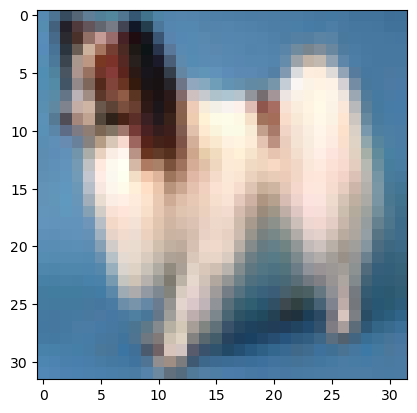

In [27]:
plt.imshow(X_train[4000])

In [28]:
y_train[4000]

array([5], dtype=uint8)

In [31]:
image[5]

'Dog'

In [32]:
X_test.shape

(10000, 32, 32, 3)

In [33]:
X_test[5432]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [247, 247, 247],
        [250, 250, 250],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255]]

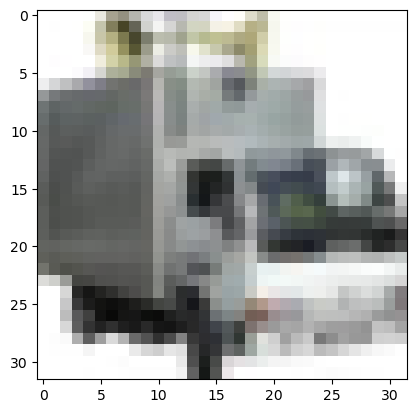

In [34]:
plt.imshow(X_test[5432])

In [35]:
y_test[5432]

array([9], dtype=uint8)

In [36]:
image[9]

'Truck'

### Scaling

In [37]:
X_train.max()

255

In [38]:
X_train.min()

0

In [39]:
X_test.max()

255

In [40]:
X_test.min()

0

In [41]:
X_train_scale = X_train/255.0

In [42]:
X_test_scale = X_test/255.0

In [43]:
X_train_scale.shape

(50000, 32, 32, 3)

In [44]:
X_train.shape

(50000, 32, 32, 3)

In [45]:
X_train_scale.max()

1.0

In [46]:
X_test_scale.shape

(10000, 32, 32, 3)

In [47]:
X_test_scale.max()

1.0

In [48]:
X_test_scale.min()

0.0

### Model Building

In [70]:
import warnings

In [71]:
warnings.filterwarnings("ignore")

In [72]:
from tensorflow.keras.models import Sequential

In [73]:
from tensorflow.keras.layers import Dense,Flatten

In [74]:
smodel = Sequential()

In [75]:
smodel.add(Flatten(input_shape = (32,32, 3) ) )

In [76]:
smodel.add(Dense(64, activation = "relu"))

In [77]:
smodel.add(Dense(128, activation = "relu"))

In [78]:
smodel.add(Dense( 256, activation = "relu"))

In [79]:
smodel.add(Dense(10, activation= "softmax" ))

In [80]:
smodel.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 240,586 (939.79 KB)

 Trainable params: 240,586 (939.79 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
smodel.compile( optimizer = "adam",
               loss = "sparse_categorical_crossentropy",
               metrics = ["accuracy"] )

In [83]:
smodel.fit(X_train_scale, y_train, epochs = 20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.2636 - loss: 1.9913
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3547 - loss: 1.7808
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3678 - loss: 1.7444
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3823 - loss: 1.7094
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3949 - loss: 1.6818
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3975 - loss: 1.6610
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3993 - loss: 1.6637
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4110 - loss: 1.6299
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4142 - loss: 1.6165
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4297 - loss: 1.5803
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4302 - loss: 1.5743
Epoch 12/20
1563/15

In [84]:
smodel.evaluate(X_test_scale,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4198 - loss: 1.6293


[1.6440439224243164, 0.4169999957084656]

### Prediction

In [85]:
X_train_scale[1000]

array([[[0.94901961, 0.95294118, 0.98039216],
        [0.94901961, 0.95294118, 0.98039216],
        [0.95686275, 0.95686275, 0.98823529],
        ...,
        [0.96078431, 0.95686275, 0.97647059],
        [0.96078431, 0.95686275, 0.97647059],
        [0.95686275, 0.95686275, 0.97254902]],

       [[0.96078431, 0.95294118, 0.98039216],
        [0.96078431, 0.95294118, 0.98039216],
        [0.96078431, 0.95686275, 0.98431373],
        ...,
        [0.96078431, 0.95686275, 0.97647059],
        [0.96078431, 0.95686275, 0.97647059],
        [0.95686275, 0.95294118, 0.97254902]],

       [[0.96862745, 0.96078431, 0.98039216],
        [0.96470588, 0.95686275, 0.97647059],
        [0.96470588, 0.95686275, 0.97647059],
        ...,
        [0.96078431, 0.95686275, 0.97647059],
        [0.96078431, 0.95686275, 0.97647059],
        [0.96078431, 0.95294118, 0.97254902]],

       ...,

       [[0.43529412, 0.52941176, 0.56470588],
        [0.42352941, 0.50196078, 0.54509804],
        [0.44313725, 0

In [86]:
X_train_scale[1000].shape

(32, 32, 3)

In [87]:
X_train_scale.shape

(50000, 32, 32, 3)

In [88]:
img = X_train_scale[1000].reshape( (1, ) + X_train_scale[1000].shape)

In [89]:
img.shape

(1, 32, 32, 3)

In [90]:
smodel.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


array([[0.0877115 , 0.22640507, 0.01086373, 0.00711706, 0.00670091,
        0.00401286, 0.0015893 , 0.02650671, 0.08889975, 0.5401932 ]],
      dtype=float32)

In [91]:
np.argmax(smodel.predict(img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


9

In [92]:
image[9]

'Truck'

In [94]:
y_train[1000]

array([9], dtype=uint8)

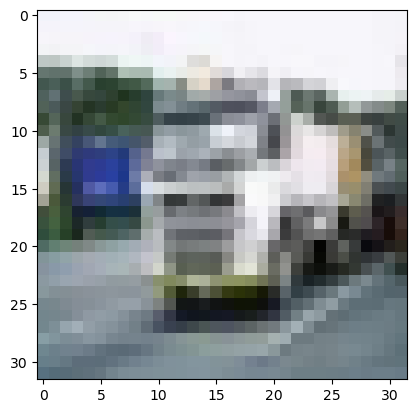

In [95]:
plt.imshow(X_train_scale[1000])

### Prediction 2

In [96]:
X_test_scale[5000]

array([[[0.2       , 0.25490196, 0.28627451],
        [0.30588235, 0.34117647, 0.37647059],
        [0.27843137, 0.3254902 , 0.35686275],
        ...,
        [0.27058824, 0.23137255, 0.20392157],
        [0.25882353, 0.25098039, 0.21176471],
        [0.24705882, 0.25098039, 0.20784314]],

       [[0.50980392, 0.50980392, 0.49411765],
        [0.77647059, 0.76862745, 0.75294118],
        [0.55294118, 0.56078431, 0.54117647],
        ...,
        [0.24705882, 0.20784314, 0.18039216],
        [0.22745098, 0.21960784, 0.18039216],
        [0.21568627, 0.22352941, 0.18039216]],

       [[0.28627451, 0.25490196, 0.21568627],
        [0.31372549, 0.28235294, 0.24313725],
        [0.27843137, 0.28235294, 0.23137255],
        ...,
        [0.22745098, 0.18823529, 0.16078431],
        [0.20784314, 0.2       , 0.16470588],
        [0.19607843, 0.20392157, 0.16078431]],

       ...,

       [[0.49411765, 0.45490196, 0.39215686],
        [0.4627451 , 0.42745098, 0.36470588],
        [0.49411765, 0

In [98]:
X_test_scale[5000].shape

(32, 32, 3)

In [99]:
img2 = X_test_scale[5000].reshape ( (1,) + X_test_scale[5000].shape)

In [100]:
img2 

array([[[[0.2       , 0.25490196, 0.28627451],
         [0.30588235, 0.34117647, 0.37647059],
         [0.27843137, 0.3254902 , 0.35686275],
         ...,
         [0.27058824, 0.23137255, 0.20392157],
         [0.25882353, 0.25098039, 0.21176471],
         [0.24705882, 0.25098039, 0.20784314]],

        [[0.50980392, 0.50980392, 0.49411765],
         [0.77647059, 0.76862745, 0.75294118],
         [0.55294118, 0.56078431, 0.54117647],
         ...,
         [0.24705882, 0.20784314, 0.18039216],
         [0.22745098, 0.21960784, 0.18039216],
         [0.21568627, 0.22352941, 0.18039216]],

        [[0.28627451, 0.25490196, 0.21568627],
         [0.31372549, 0.28235294, 0.24313725],
         [0.27843137, 0.28235294, 0.23137255],
         ...,
         [0.22745098, 0.18823529, 0.16078431],
         [0.20784314, 0.2       , 0.16470588],
         [0.19607843, 0.20392157, 0.16078431]],

        ...,

        [[0.49411765, 0.45490196, 0.39215686],
         [0.4627451 , 0.42745098, 0.36470588]

In [101]:
smodel.predict(img2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[1.5491289e-02, 9.3579181e-02, 1.4427609e-02, 4.6916723e-02,
        2.8422328e-02, 2.6351176e-02, 2.5426096e-04, 7.6710665e-01,
        2.5284759e-04, 7.1980436e-03]], dtype=float32)

In [102]:
np.argmax(smodel.predict(img2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


7

In [103]:
image[7]

'Horse'

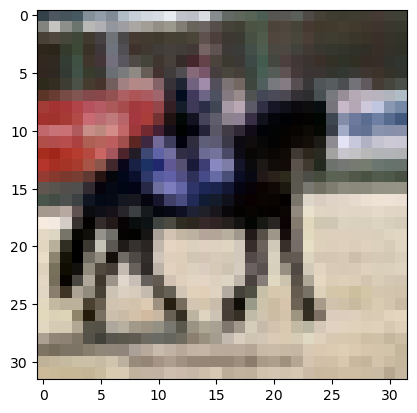

In [104]:
plt.imshow(X_test_scale[5000])

In [105]:
y_test[5000]

array([7], dtype=uint8)

In [107]:
X_test[9999]

array([[[ 73,  78,  75],
        [ 98, 103, 113],
        [ 99, 106, 114],
        ...,
        [135, 150, 152],
        [135, 149, 154],
        [203, 215, 223]],

       [[ 69,  73,  70],
        [ 84,  89,  97],
        [ 68,  75,  81],
        ...,
        [ 85,  95,  89],
        [ 71,  82,  80],
        [120, 133, 135]],

       [[ 69,  73,  70],
        [ 90,  95, 100],
        [ 62,  71,  74],
        ...,
        [ 74,  81,  70],
        [ 53,  62,  54],
        [ 62,  74,  69]],

       ...,

       [[123, 128,  96],
        [132, 132, 102],
        [129, 128, 100],
        ...,
        [108, 107,  88],
        [ 62,  60,  55],
        [ 27,  27,  28]],

       [[115, 121,  91],
        [123, 124,  95],
        [129, 126,  99],
        ...,
        [115, 116,  94],
        [ 66,  65,  59],
        [ 27,  27,  27]],

       [[116, 120,  90],
        [121, 122,  94],
        [129, 128, 101],
        ...,
        [116, 115,  94],
        [ 68,  65,  58],
        [ 27,  26,  26]]

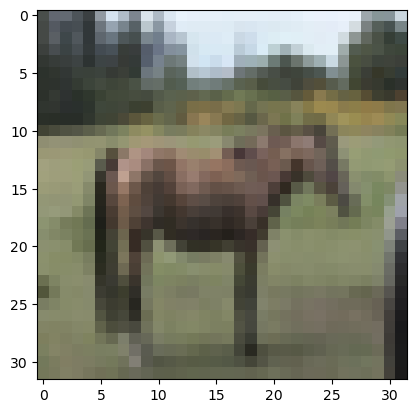

In [108]:
plt.imshow(X_test_scale[9999])

In [109]:
y_test[9999]

array([7], dtype=uint8)

In [110]:
image[7]

'Horse'